In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Detecting the objects in the image

# About YOLO in brief

[[[234 229 230]
  [234 229 230]
  [235 229 230]
  ...
  [255 240 237]
  [255 242 234]
  [255 244 232]]

 [[236 230 231]
  [236 230 231]
  [236 230 231]
  ...
  [255 242 234]
  [255 243 233]
  [255 243 231]]

 [[235 229 230]
  [235 229 230]
  [235 229 230]
  ...
  [255 242 230]
  [255 242 230]
  [253 241 231]]

 ...

 [[114 118 123]
  [100 104 109]
  [107 111 116]
  ...
  [102 104 104]
  [109 111 112]
  [111 113 114]]

 [[113 125 129]
  [121 130 134]
  [116 122 127]
  ...
  [107 109 110]
  [101 103 104]
  [ 98 100 101]]

 [[102 126 126]
  [120 132 136]
  [112 116 121]
  ...
  [103 105 106]
  [105 107 108]
  [ 98 100 101]]]


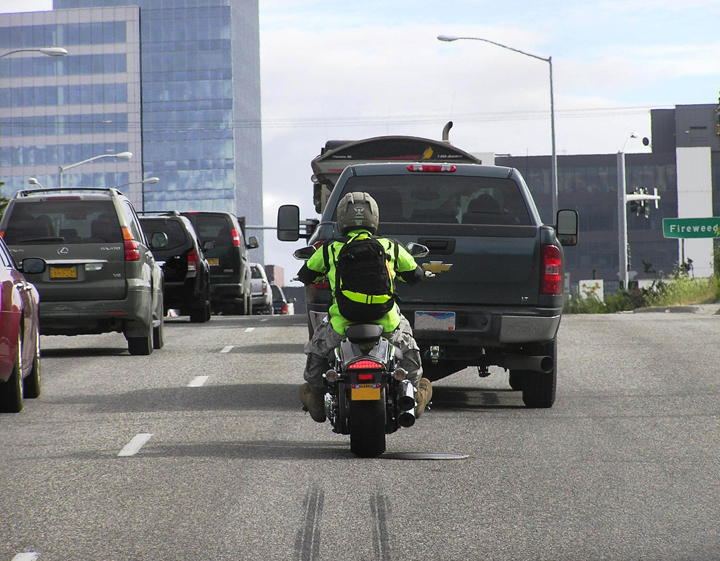

The height is 561
The width is 720


In [ ]:
import numpy as  np
import cv2



img_to_detect = cv2.imread('/content/drive/MyDrive/DL Labs/Lab-Object Detection/testimage.jpg')
print(img_to_detect) 


from google.colab.patches import cv2_imshow
cv2_imshow(img_to_detect)


img_height = img_to_detect.shape[0]
print("The height is", img_height)
img_width = img_to_detect.shape[1]
print("The width is", img_width)


In [ ]:


img_blob = cv2.dnn.blobFromImage(img_to_detect, 0.003922, (416, 416), swapRB=True, crop=False)



In [ ]:

class_labels = ["person","bicycle","car","motorcycle","airplane","bus","train","truck","boat",
                "trafficlight","firehydrant","stopsign","parkingmeter","bench","bird","cat",
                "dog","horse","sheep","cow","elephant","bear","zebra","giraffe","backpack",
                "umbrella","handbag","tie","suitcase","frisbee","skis","snowboard","sportsball",
                "kite","baseballbat","baseballglove","skateboard","surfboard","tennisracket",
                "bottle","wineglass","cup","fork","knife","spoon","bowl","banana","apple",
                "sandwich","orange","broccoli","carrot","hotdog","pizza","donut","cake","chair",
                "sofa","pottedplant","bed","diningtable","toilet","tvmonitor","laptop","mouse",
                "remote","keyboard","cellphone","microwave","oven","toaster","sink","refrigerator",
                "book","clock","vase","scissors","teddybear","hairdrier","toothbrush"]

In [ ]:

class_colors = ["0,255,0","0,0,255","255,0,0","255,255,0","0,255,255"]
class_colors = [np.array(every_color.split(",")).astype("int") for every_color in class_colors]
class_colors = np.array(class_colors)
class_colors = np.tile(class_colors,(16,1)) 

In [ ]:

yolo_model = cv2.dnn.readNetFromDarknet('/content/drive/MyDrive/DL Labs/Lab-Object Detection/yolov3.cfg','/content/drive/MyDrive/DL Labs/Lab-Object Detection/yolov3.weights')


yolo_layers = yolo_model.getLayerNames()
print(yolo_layers) 


yolo_output_layer = [yolo_layers[yolo_layer[0] - 1] for yolo_layer in yolo_model.getUnconnectedOutLayers()]
print(yolo_output_layer) # intermediate layers

['conv_0', 'bn_0', 'relu_0', 'conv_1', 'bn_1', 'relu_1', 'conv_2', 'bn_2', 'relu_2', 'conv_3', 'bn_3', 'relu_3', 'shortcut_4', 'conv_5', 'bn_5', 'relu_5', 'conv_6', 'bn_6', 'relu_6', 'conv_7', 'bn_7', 'relu_7', 'shortcut_8', 'conv_9', 'bn_9', 'relu_9', 'conv_10', 'bn_10', 'relu_10', 'shortcut_11', 'conv_12', 'bn_12', 'relu_12', 'conv_13', 'bn_13', 'relu_13', 'conv_14', 'bn_14', 'relu_14', 'shortcut_15', 'conv_16', 'bn_16', 'relu_16', 'conv_17', 'bn_17', 'relu_17', 'shortcut_18', 'conv_19', 'bn_19', 'relu_19', 'conv_20', 'bn_20', 'relu_20', 'shortcut_21', 'conv_22', 'bn_22', 'relu_22', 'conv_23', 'bn_23', 'relu_23', 'shortcut_24', 'conv_25', 'bn_25', 'relu_25', 'conv_26', 'bn_26', 'relu_26', 'shortcut_27', 'conv_28', 'bn_28', 'relu_28', 'conv_29', 'bn_29', 'relu_29', 'shortcut_30', 'conv_31', 'bn_31', 'relu_31', 'conv_32', 'bn_32', 'relu_32', 'shortcut_33', 'conv_34', 'bn_34', 'relu_34', 'conv_35', 'bn_35', 'relu_35', 'shortcut_36', 'conv_37', 'bn_37', 'relu_37', 'conv_38', 'bn_38', 're

In [ ]:

yolo_model.setInput(img_blob)

obj_detection_layers = yolo_model.forward(yolo_output_layer)



In [ ]:

for object_detection_layer in obj_detection_layers:
    for object_detection in object_detection_layer:
        
        
        all_scores = object_detection[5:] 
        predicted_class_id = np.argmax(all_scores) 
        prediction_confidence = all_scores[predicted_class_id] 
    
        
        if prediction_confidence > 0.20: 
            
            predicted_class_label = class_labels[predicted_class_id] 
            bounding_box = object_detection[0:4] * np.array([img_width, img_height, img_width, img_height])
            print("Boundaries are", bounding_box)
            (box_center_x_pt, box_center_y_pt, box_width, box_height) = bounding_box.astype("int")
            start_x_pt = int(box_center_x_pt - (box_width / 2))
            start_y_pt = int(box_center_y_pt - (box_height / 2))
            end_x_pt = start_x_pt + box_width
            end_y_pt = start_y_pt + box_height
            
           
            box_color = class_colors[predicted_class_id]
            
            
            box_color = [int(c) for c in box_color]
            
           
            predicted_class_label = "{}: {:.2f}%".format(predicted_class_label, prediction_confidence * 100)
            print("predicted object {}".format(predicted_class_label))
            
           
            cv2.rectangle(img_to_detect, (start_x_pt, start_y_pt), (end_x_pt, end_y_pt), box_color, 1)
            cv2.putText(img_to_detect, predicted_class_label, (start_x_pt, start_y_pt-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, box_color, 1)

Boundaries are [ 90.28651357 274.53447363 164.87914324 172.14958012]
predicted object car: 99.14%
Boundaries are [362.17430592 287.18837678 159.56501126 166.24053088]
predicted object person: 91.97%
Boundaries are [431.44143105 272.02605647 291.03313208 271.80436116]
predicted object truck: 82.44%
Boundaries are [365.27335167 373.5499329  155.13374448 156.32797542]
predicted object motorcycle: 73.97%
Boundaries are [ 88.36718917 272.33332014 161.18939996 171.94943574]
predicted object car: 97.11%
Boundaries are [176.76857114 267.38314489  84.42138076 108.09858839]
predicted object car: 95.33%
Boundaries are [214.00929451 262.85288662  92.73465157 102.42088138]
predicted object car: 97.37%
Boundaries are [366.11174583 293.24139422 124.78701711 200.09958985]
predicted object person: 98.43%
Boundaries are [ 23.90418738 312.0023008   45.59488177 204.85579008]
predicted object car: 87.79%
Boundaries are [371.20064735 378.24315226 114.42805767 158.46166733]
predicted object motorcycle: 91.93

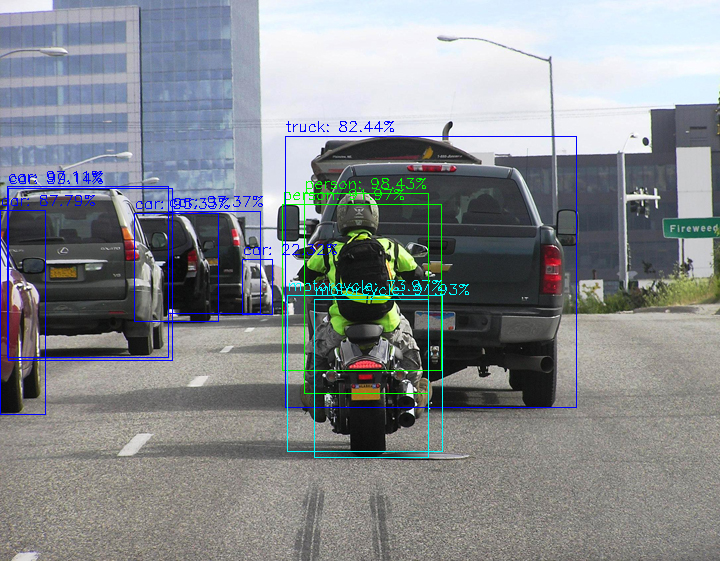

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img_to_detect)

# Drawback 

# Question 1: Overcome the above drawback

# Question 2: Object Detection from Live Video in Google Colab

# Question 3: Object Detection from Web Cam in Google Colab